In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
ldom = np.array([[35, 55],[-135, -121]])
ldom = np.array([[45, 49],[-126, -123]])
qbox = np.array([[-124.5,-124,-124.3,-124.8,-124.5],[46.5,46.5,47.5,47.5,46.5]])
fecha=['1950-01-01','2019-12-31']

In [3]:
#get bathymetry from ETOPO1
fname_topo = '~/Documents/LargeData/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fname_topo)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

In [4]:
# SST
ds2 = xr.open_dataset('../data/timeseries_sst_mur_01km.nc')
ds2.close()
ds2

<xarray.Dataset>
Dimensions:           (lat: 401, lon: 301, time: 212)
Coordinates:
  * time              (time) datetime64[ns] 2002-06-30 2002-07-31 ... 2020-01-31
  * lon               (lon) float32 -126.0 -125.99 -125.98 ... -123.01 -123.0
  * lat               (lat) float32 45.0 45.01 45.02 45.03 ... 48.98 48.99 49.0
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...

In [5]:
# average averages, and variability
ds = ds2.sel(lon=slice(ldom[1,0],ldom[1,1]),lat=slice(ldom[0,0],ldom[0,1]))
msst = ds.analysed_sst.mean('time') - 273.15
stdsst = ds.analysed_sst.std('time')

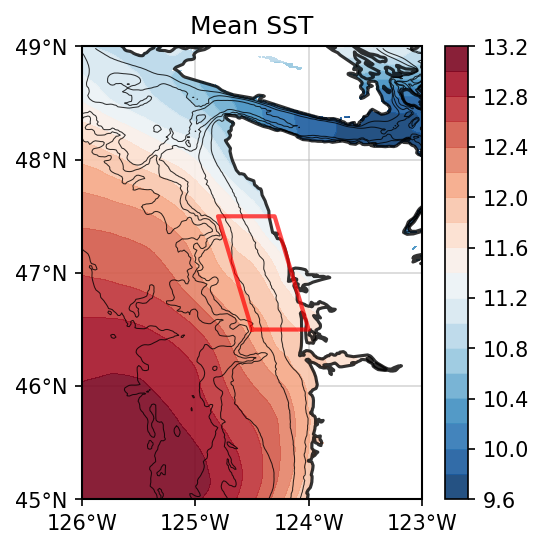

In [6]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.contourf(msst.lon, msst.lat,msst, levels=20,cmap='RdBu_r', zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('Mean SST')
plt.colorbar()
plt.savefig('./AnnualSSTmean_1km_small.png')
plt.show()

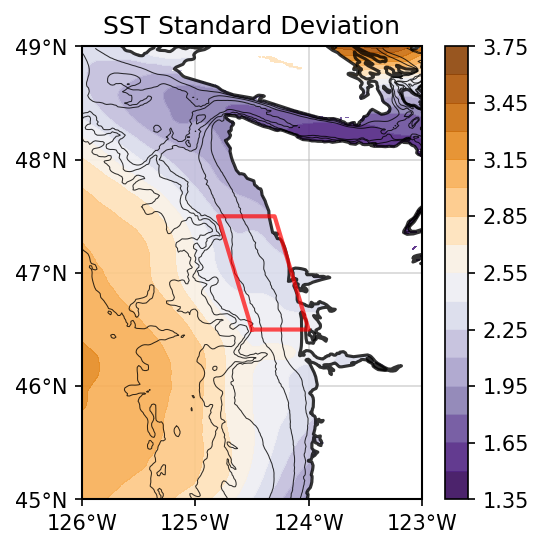

In [7]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.contourf(stdsst.lon, stdsst.lat,stdsst, levels=20,cmap='PuOr_r', zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('SST Standard Deviation')
plt.colorbar()
plt.savefig('./AnnualSSTstdev_1km_small.png')
plt.show()

In [ ]:
# monthly SST - climatology
months=['January','February','March','April','May','June','July','August','September','October','November','December']
#datax,datay=np.meshgrid(ds.lon.values,ds.lat.values)
dsmon=ds.groupby('time.month').mean('time')
sst_m=int(np.floor(dsmon.analysed_sst.min().values-273.15))
sst_M=int(np.ceil(dsmon.analysed_sst.max().values-273.15))
lev=np.arange(int(np.floor(sst_m)),int(np.ceil(sst_M)+1),0.5)
fig=plt.figure(figsize=(12,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
        #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
    plt.contourf(dsmon.lon, dsmon.lat, dsmon.analysed_sst[i,:,:]-273.15, levels=lev,cmap='RdBu_r', zorder=2, alpha=0.9, extend='both')
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(int(lev[0]),int(lev[-1])+1,2)])
    plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
    plt.title(months[i])
    
#plt.colorbar(fraction=0.06, pad=0.04)
plt.tight_layout(h_pad=1)

plt.savefig('./SST_monthly_clim_1km_small.png')
plt.show()

In [10]:
dsmon.to_netcdf('./MURSST_QIN_monthly_clim_1km_06-2002_01-2020.nc')

In [35]:
# wind
ds2 = xr.open_dataset('../data/timeseries_wind_ccmp_25km.nc')
ds2.close()
ds2

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 60, time: 394)
Coordinates:
  * time     (time) datetime64[ns] 1987-07-31 1987-08-31 ... 2020-04-30
  * lon      (lon) float32 -134.875 -134.625 -134.375 ... -120.375 -120.125
  * lat      (lat) float32 35.125 35.375 35.625 35.875 ... 54.375 54.625 54.875
Data variables:
    uwnd     (time, lat, lon) float32 ...
    vwnd     (time, lat, lon) float32 ...

In [36]:
# average averages, and variability
ds = ds2.sel(lon=slice(ldom[1,0],ldom[1,1]),lat=slice(ldom[0,0],ldom[0,1]))
muwnd = ds.uwnd.mean('time')
mvwnd = ds.vwnd.mean('time')
mnspd = np.sqrt(muwnd**2+mvwnd**2)
stduwnd = ds.uwnd.std('time')
stdvwnd = ds.vwnd.std('time')
mnstd = np.sqrt(stduwnd**2+stdvwnd**2)

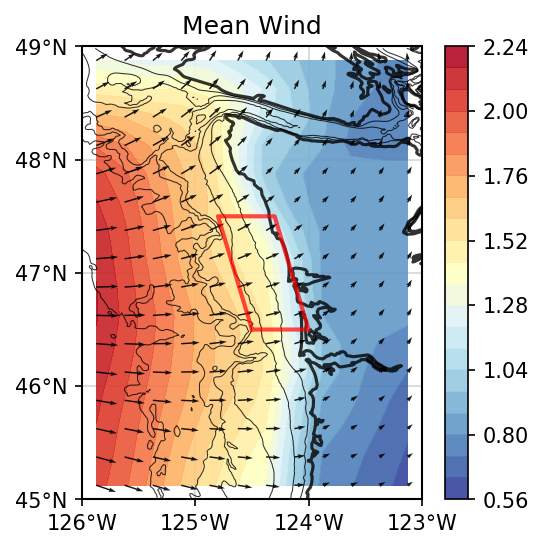

In [37]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0]+1,ldom[1,1]-1,ldom[0,0]+1,ldom[0,1]-1],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.contourf(ds.lon, ds.lat, mnspd, levels=20,cmap='RdYlBu_r', zorder=2, alpha=0.9)
plt.colorbar()
plt.quiver(ds.lon, ds.lat, muwnd, mvwnd, zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('Mean Wind')

plt.savefig('./AnnualWindmean_25km_small.png')
plt.show()

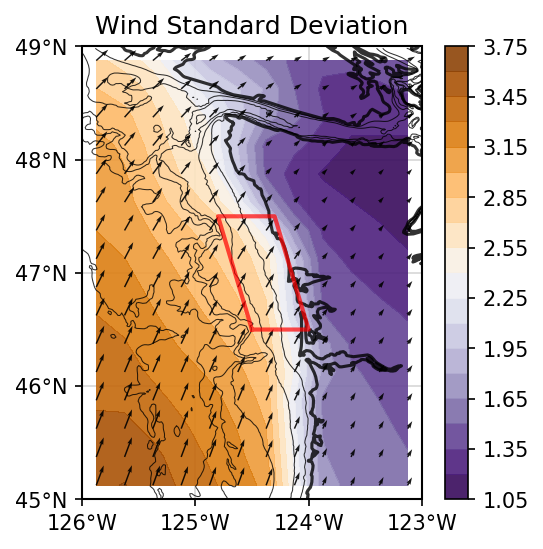

In [38]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.contourf(ds.lon, ds.lat, mnstd, levels=20,cmap='PuOr_r', zorder=2, alpha=0.9)
plt.colorbar()
plt.quiver(ds.lon, ds.lat, stduwnd, stdvwnd, zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('Wind Standard Deviation')

plt.savefig('./AnnualWindStdev_25km_small.png')
plt.show()

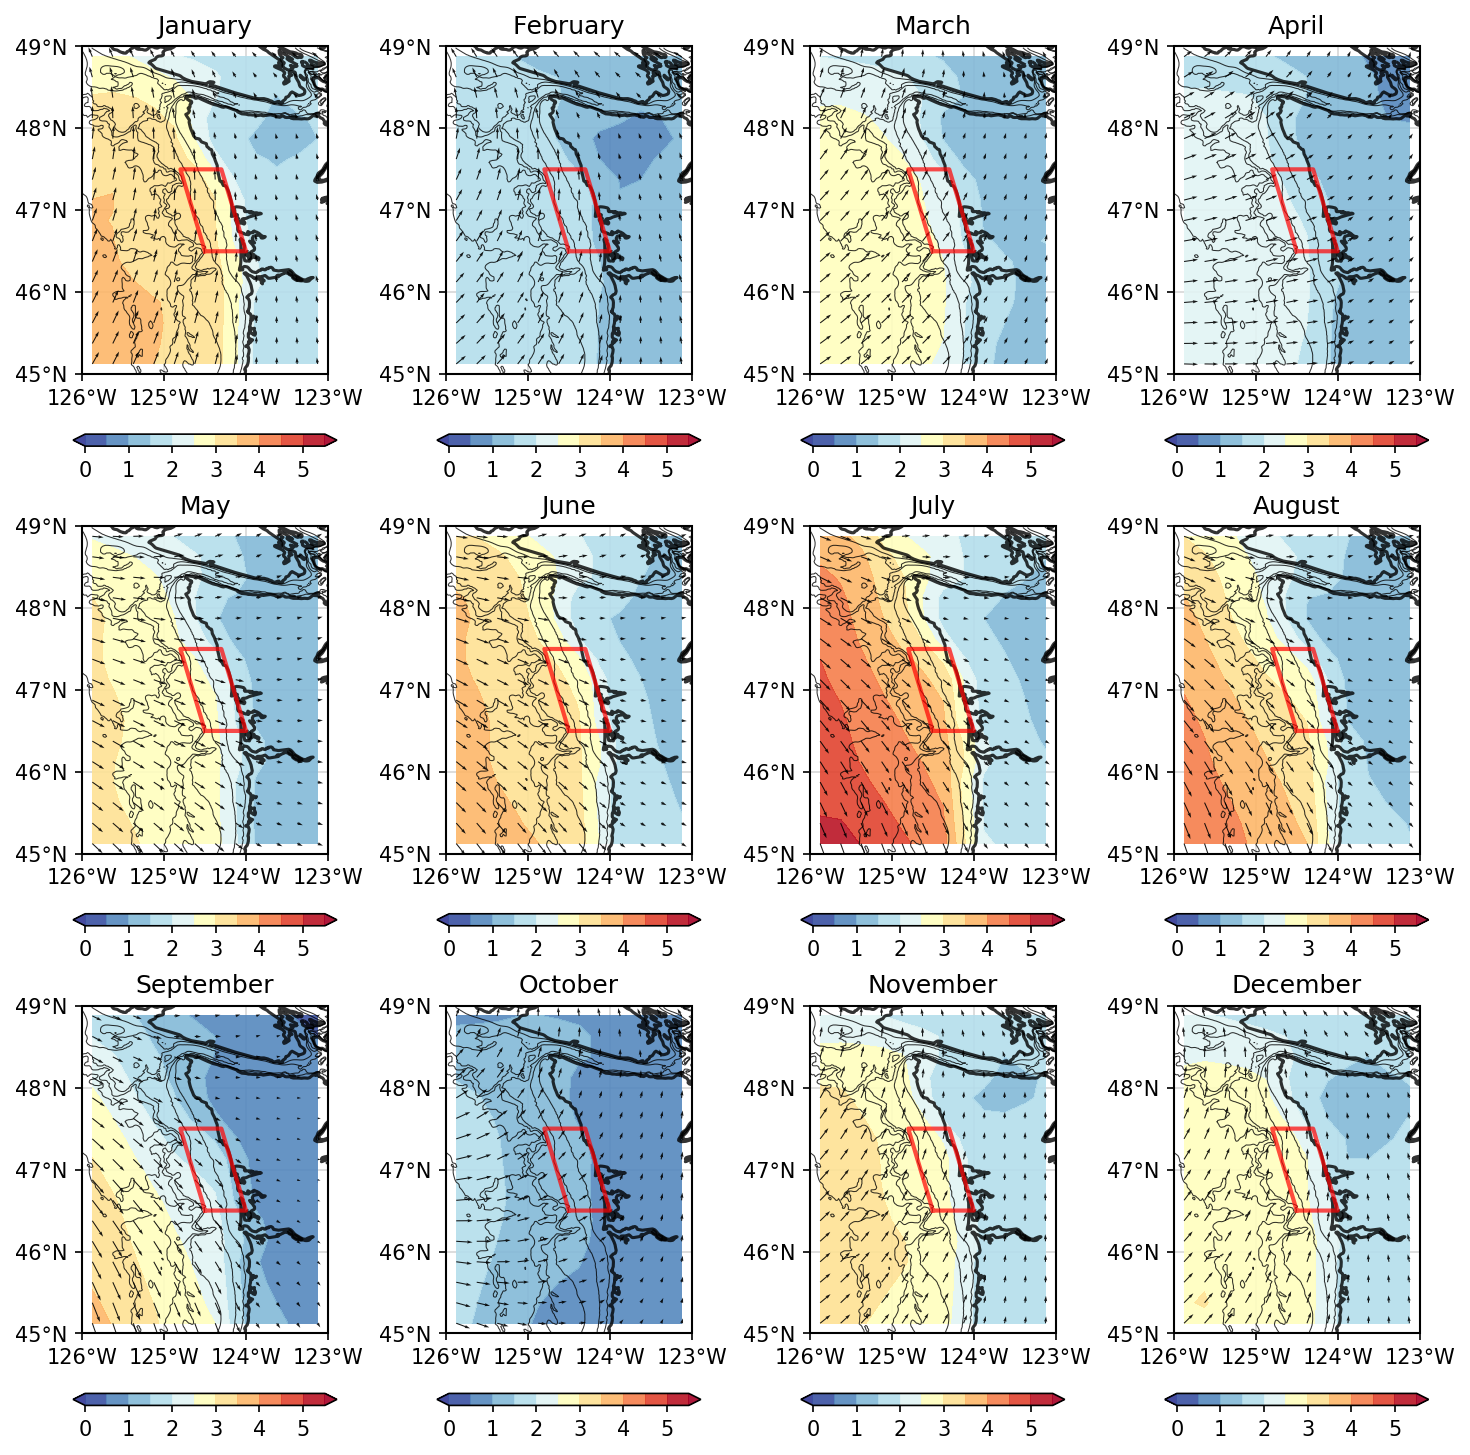

In [39]:
# monthly SST - climatology
months=['January','February','March','April','May','June','July','August','September','October','November','December']
#datax,datay=np.meshgrid(ds.lon.values,ds.lat.values)
dsmon=ds.groupby('time.month').mean('time')
lev=np.arange(0,6,0.5)
fig=plt.figure(figsize=(12,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
        #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
    spd = np.sqrt(dsmon.uwnd[i,:,:]**2+dsmon.vwnd[i,:,:]**2)
    im=plt.contourf(dsmon.lon, dsmon.lat, spd, levels=lev,cmap='RdYlBu_r', zorder=2, alpha=0.9, extend='both')
    plt.colorbar(orientation='horizontal',fraction=0.03)
    plt.quiver(dsmon.lon, dsmon.lat, dsmon.uwnd[i,:,:],dsmon.vwnd[i,:,:],zorder=3,alpha=0.9)
    plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
    plt.title(months[i])
    
#plt.colorbar(fraction=0.06, pad=0.04)
plt.tight_layout(h_pad=1)

plt.savefig('./Wind_monthly_clim_25km_small.png')
plt.show()

In [40]:
# currents
ds2 = xr.open_dataset('../data/timeseries_ssh_currents_aviso_25km.nc')
ds2.close()
ds2

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 60, nv: 2, time: 293)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-31 1993-02-28 ... 2017-05-31
    lon_bnds   (longitude, nv) float32 ...
    crs        int32 ...
  * nv         (nv) int32 0 1
  * longitude  (longitude) float32 -134.875 -134.625 ... -120.375 -120.125
  * latitude   (latitude) float32 35.125 35.375 35.625 ... 54.375 54.625 54.875
Data variables:
    adt        (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...

In [41]:
# average averages, and variability
ds = ds2.sel(longitude=slice(ldom[1,0],ldom[1,1]),latitude=slice(ldom[0,0],ldom[0,1]))
mucur = ds.ugos.mean('time')
mvcur = ds.vgos.mean('time')
mncurspd = np.sqrt(mucur**2+mvcur**2)
stducur = ds.ugos.std('time')
stdvcur = ds.vgos.std('time')
stdcurspd = np.sqrt(stducur**2+stdvcur**2)

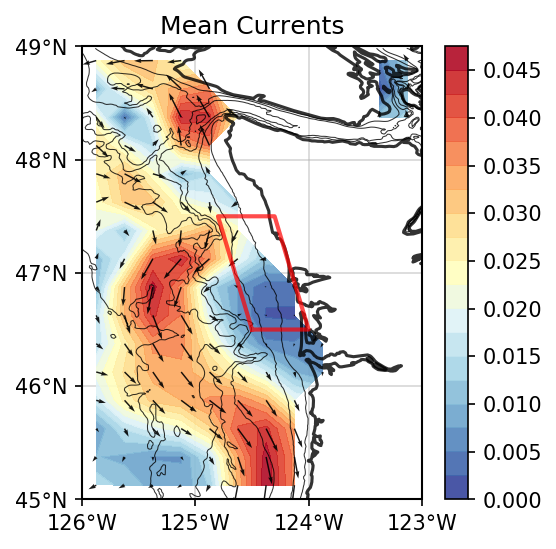

In [42]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.contourf(ds.longitude, ds.latitude, mncurspd, levels=20,cmap='RdYlBu_r', zorder=2, alpha=0.9)
plt.colorbar()
plt.quiver(ds.longitude, ds.latitude, mucur, mvcur, zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('Mean Currents')

plt.savefig('./AnnualCurrentmean_25km_small.png')
plt.show()

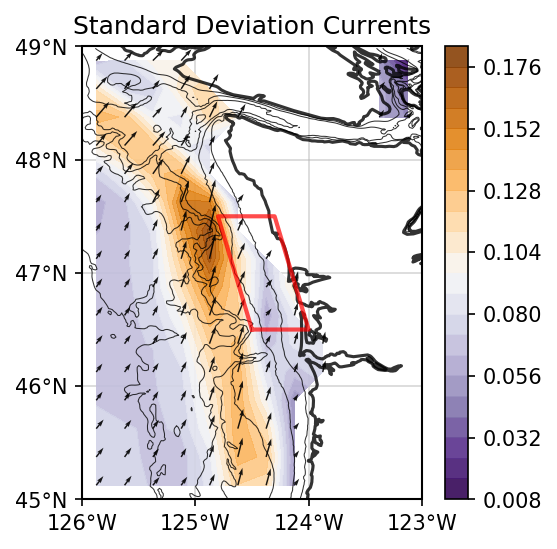

In [43]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.contourf(ds.longitude, ds.latitude, stdcurspd, levels=20,cmap='PuOr_r', zorder=2, alpha=0.9)
plt.colorbar()
plt.quiver(ds.longitude, ds.latitude, stducur, stdvcur, zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('Standard Deviation Currents')

plt.savefig('./AnnualCurrentStdev_25km_small.png')
plt.show()

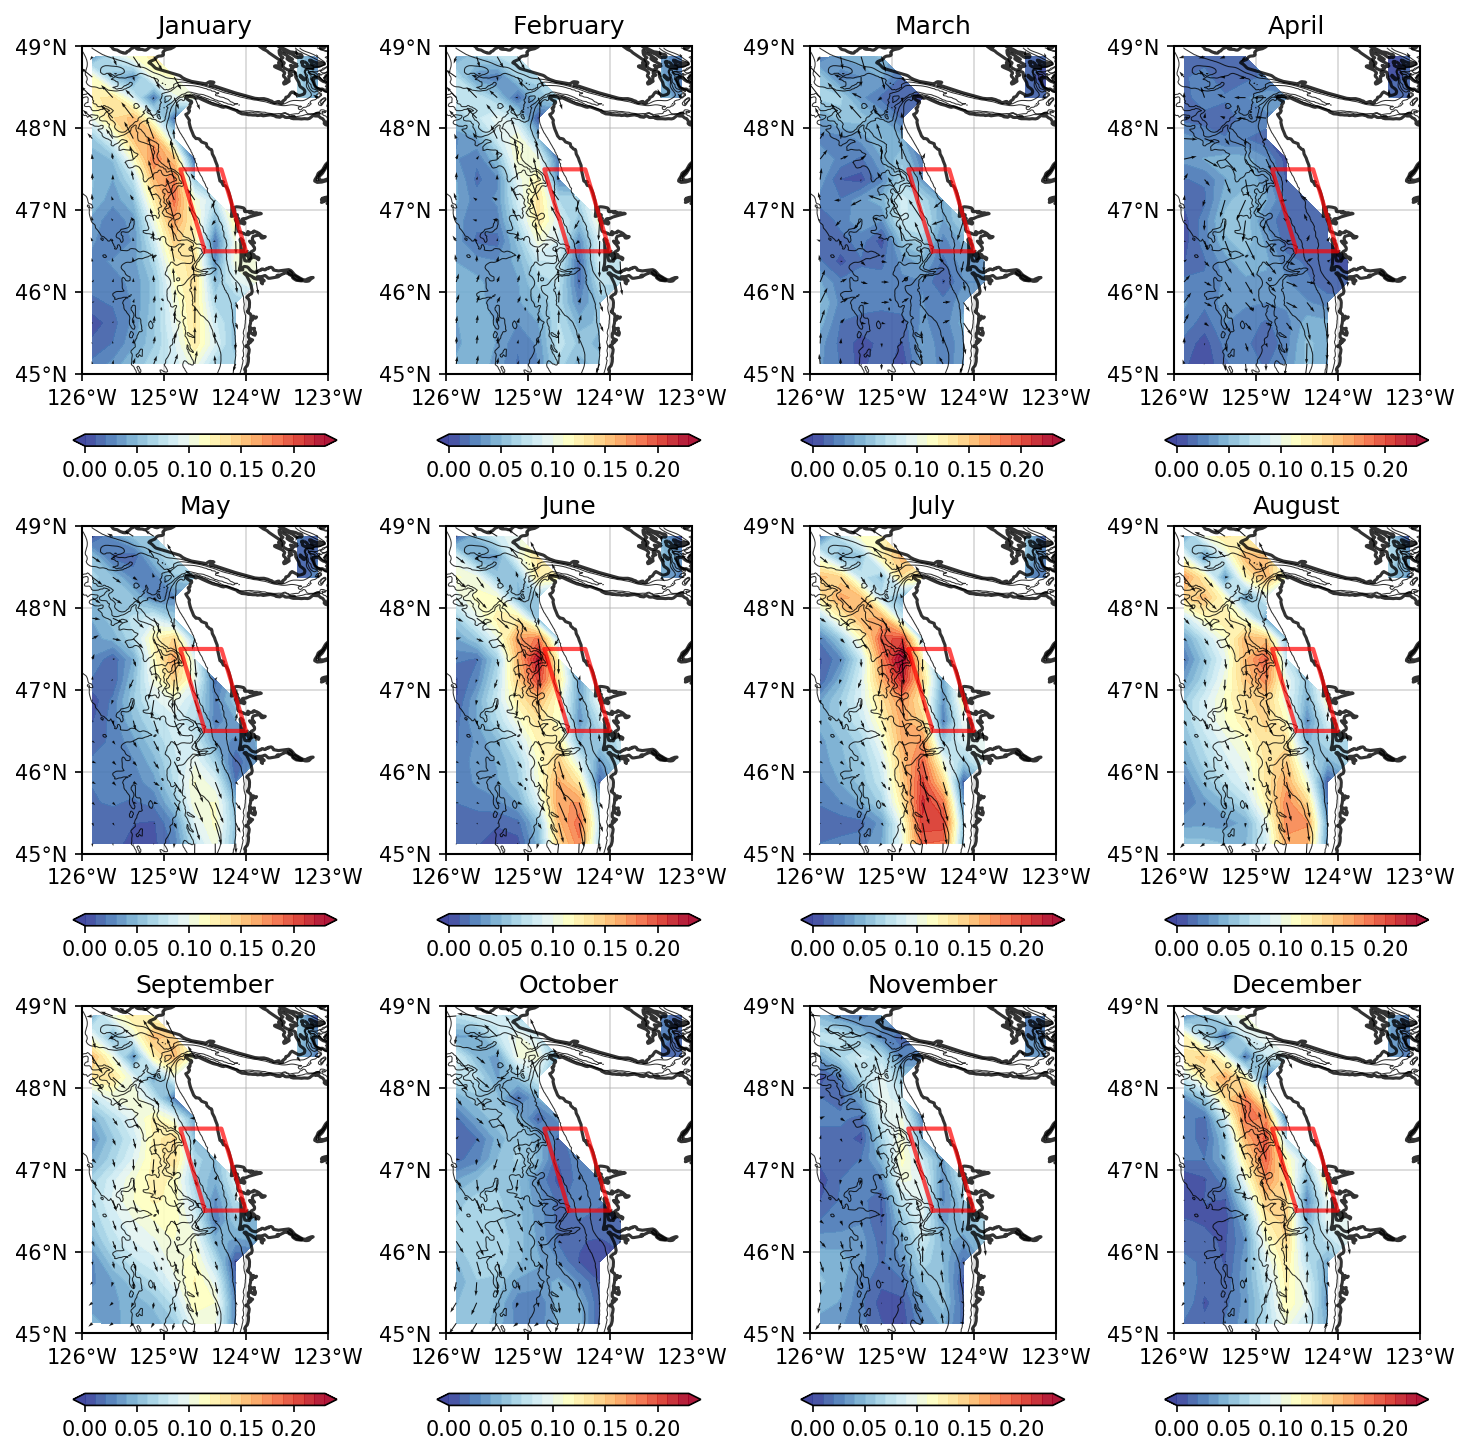

In [44]:
# monthly SST - climatology
months=['January','February','March','April','May','June','July','August','September','October','November','December']
#datax,datay=np.meshgrid(ds.lon.values,ds.lat.values)
dsmon=ds.groupby('time.month').mean('time')
lev=np.arange(0,0.24,0.01)
fig=plt.figure(figsize=(12,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,1)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,1)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
        #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-5000,-2000,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
    spd = np.sqrt(dsmon.ugos[i,:,:]**2+dsmon.vgos[i,:,:]**2)
    im=plt.contourf(dsmon.longitude, dsmon.latitude, spd, levels=lev,cmap='RdYlBu_r', zorder=2, alpha=0.9, extend='both')
    plt.colorbar(orientation='horizontal',fraction=0.03,ticks=[0,0.05,0.1,0.15,0.2])
    plt.quiver(dsmon.longitude, dsmon.latitude, dsmon.ugos[i,:,:],dsmon.vgos[i,:,:],zorder=3,alpha=0.9)
    plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
    plt.title(months[i])
    
#plt.colorbar(fraction=0.06, pad=0.04)
plt.tight_layout(h_pad=1)

plt.savefig('./currents_monthly_clim_25km_small.png')
plt.show()